<a href="https://colab.research.google.com/github/johnjoel2001/Mechanistic_Interpretability/blob/main/Mechanistic_Interpretability.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **XAI - AIPI 590**

**Assignment 06 - Mechanistic Interpretability**

**John Rohit Ernest Jayaraj**

In [16]:
# Connects to any needed files from GitHub and Google Drive
import os

# Remove Colab default sample_data
!rm -r ./sample_data

# Clone GitHub files to colab workspace
repo_name = "Mechanistic_Interpretability"
git_path = 'https://github.com/johnjoel2001/Mechanistic_Interpretability.git'
!git clone "{git_path}"

Cloning into 'Mechanistic_Interpretability'...
remote: Enumerating objects: 3, done.
remote: Counting objects: 100% (3/3), done.
remote: Total 3 (delta 0), reused 0 (delta 0), pack-reused 0 (from 0)
Receiving objects: 100% (3/3), done.


# **I chose the paper "Toy Models of Superposition".**

# **Neural Network Superposition Analysis**

**Specific Finding Implemented**
* I have decided to implement a technique from the paper "Toy Models of Superposition" that demonstrates how neural networks represent more features than the available dimensions through frequency-based prioritization.

* This implementation would show how networks learn to give stronger representations to frequently occurring features and efficiently use limited dimensional space through superposition.


**Why was this chosen?**


* This finding/tecgnique provides a clear and a testable hypothesis about how neural networks organize information.
* This offers insights into how neural networks "cheat" dimensional limitations.
* This can be created by using a simple autoencoder.

**Plan for Implementation**


1) **Model Architecture**
* Create an autoencoder with dimensional bottleneck (hidden_dim < input_dim)
* Let's use simple linear layers and ReLU activation

2) **Data Generation**
* Let us generate synthetic data with controlled feature frequencies
* Then we shall implement exponential decay for feature importance

3) **Analysis Tools**

* Measure representation strength for each feature
* Calculate interference between feature pairs
* Analyze geometric organization of features


4) **Visualization**
* Let us Plot frequency vs. representation strength correlation
* Create interference pattern heatmaps
* Visualize feature geometry in reduced dimensional space
* Show training progress and convergence

5) **Verification**
 * Finally we shall compare results with paper's predictions
 * Draw inferences from our results.


**Code Implementation**

In [3]:
# Importing Dependencies
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.decomposition import PCA
from typing import Tuple, List

**Defining Model Architecture**


* We are deliberately creating a bottleneck in the model architecture.
* Input dimension > Hidden dimension (forcing superposition)
* Simple linear layers with ReLU activation
* Autoencoder structure forces efficient information encoding

In [4]:
class SuperpositionModel(nn.Module):
    def __init__(self, input_dim: int, hidden_dim: int):
        super().__init__()
        self.encoder = nn.Linear(input_dim, hidden_dim)
        self.activation = nn.ReLU()
        self.decoder = nn.Linear(hidden_dim, input_dim)

    def forward(self, x: torch.Tensor):
        encoded = self.activation(self.encoder(x))
        decoded = self.decoder(encoded)
        return decoded

**Data Generation**

We are creating exponentially decaying feature frequencies by mimicking natural data distributions and emphasising on feature importance.

In [5]:
def generate_frequency_based_data(num_samples,num_features,frequency_decay= 0.8):
    frequencies = np.power(frequency_decay, np.arange(num_features))
    frequencies = frequencies / np.sum(frequencies)

    data = torch.zeros((num_samples, num_features))
    for i in range(num_samples):
        active = torch.tensor(np.random.random(num_features) < frequencies)
        data[i, active] = torch.randn(active.sum())

    return data, frequencies

**Model Training**

In [7]:
def train_model(model: SuperpositionModel, data,num_epochs= 1000,log_every = 100):
    optimizer = optim.Adam(model.parameters()) # Using Adam optimizer
    criterion = nn.MSELoss()  # Using reconstruction loss (MSELoss)

    losses = []               # Tracking loss for monitoring convergence

    for epoch in range(num_epochs): # Standard Training Loop
        optimizer.zero_grad()
        output = model(data)
        loss = criterion(output, data)
        loss.backward()
        optimizer.step()

        if epoch % log_every == 0: # Log Progress
            losses.append(loss.item())
            print(f"Epoch {epoch}, Loss: {loss.item():.4f}")

    return losses

**Feature Analysis**

* Over here we analyze how features are represented in the hidden space.
* We use activation maximization to understand feature representations.

In [14]:
def analyze_feature_geometry(model:SuperpositionModel,data) :

    feature_directions = []
    feature_strengths = []

    # Analyzing each feature separately
    for i in range(data.shape[1]):
        # Creating input that isolates this feature
        input_data = torch.zeros_like(data[0])
        input_data[i] = 1.0

        # Getting the representation
        with torch.no_grad():
            encoded = model.encoder(input_data)
            # Calculating representation strength
            strength = torch.norm(encoded).item()
            # Calculateign normalized direction
            direction = encoded / (strength + 1e-6)

        feature_directions.append(direction.numpy())
        feature_strengths.append(strength)

    return np.array(feature_directions), np.array(feature_strengths)

**Plots & Visualisations**

Generating data...

Training model...
Epoch 0, Loss: 0.0835
Epoch 10, Loss: 0.0769
Epoch 20, Loss: 0.0713
Epoch 30, Loss: 0.0665
Epoch 40, Loss: 0.0622
Epoch 50, Loss: 0.0585
Epoch 60, Loss: 0.0551
Epoch 70, Loss: 0.0521
Epoch 80, Loss: 0.0493
Epoch 90, Loss: 0.0468
Epoch 100, Loss: 0.0445
Epoch 110, Loss: 0.0425
Epoch 120, Loss: 0.0406
Epoch 130, Loss: 0.0388
Epoch 140, Loss: 0.0371
Epoch 150, Loss: 0.0356
Epoch 160, Loss: 0.0342
Epoch 170, Loss: 0.0329
Epoch 180, Loss: 0.0317
Epoch 190, Loss: 0.0306
Epoch 200, Loss: 0.0295
Epoch 210, Loss: 0.0283
Epoch 220, Loss: 0.0272
Epoch 230, Loss: 0.0260
Epoch 240, Loss: 0.0248
Epoch 250, Loss: 0.0237
Epoch 260, Loss: 0.0227
Epoch 270, Loss: 0.0217
Epoch 280, Loss: 0.0208
Epoch 290, Loss: 0.0199
Epoch 300, Loss: 0.0190
Epoch 310, Loss: 0.0183
Epoch 320, Loss: 0.0175
Epoch 330, Loss: 0.0168
Epoch 340, Loss: 0.0162
Epoch 350, Loss: 0.0155
Epoch 360, Loss: 0.0149
Epoch 370, Loss: 0.0143
Epoch 380, Loss: 0.0138
Epoch 390, Loss: 0.0133
Epoch 400, Lo

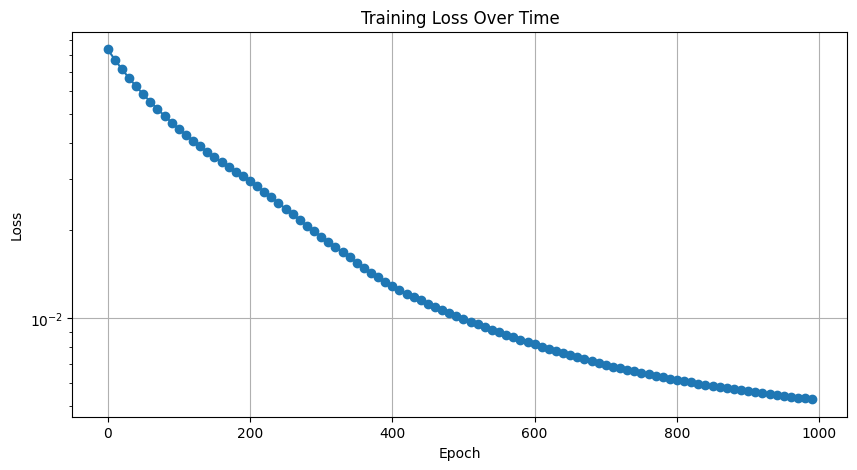


2. Frequency-Strength Correlation


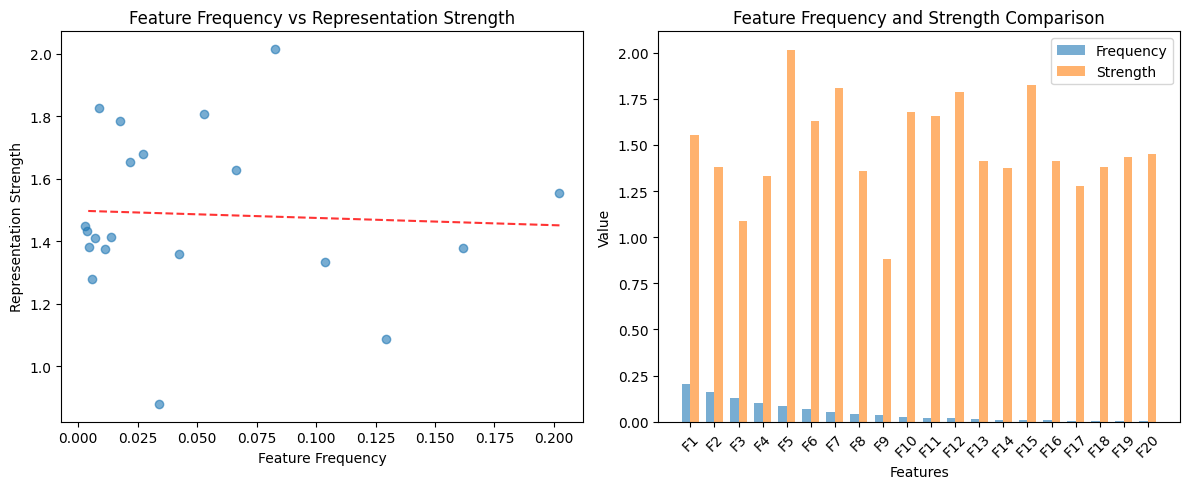


Key Findings:
 Correlation between frequency and representation strength: -0.051
 Average interference between features: 0.879


In [15]:
def plot_training_progress(losses, log_every) :   # Plotting Training loss over time

    plt.figure(figsize=(10, 5))
    epochs = range(0, len(losses) * log_every, log_every)
    plt.plot(epochs, losses, '-o')
    plt.title('Training Loss Over Time')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.yscale('log')  # Log scale helps visualize improvement
    plt.grid(True)
    plt.show()

def plot_frequency_strength_correlation(frequencies,strengths,feature_names): #  Visualizing relationship between feature frequency and representation strength.

    plt.figure(figsize=(12, 5))

    # Scatter plot with trend line
    plt.subplot(1, 2, 1)
    plt.scatter(frequencies, strengths, alpha=0.6)
    # Adding a  trend line to show correlation
    z = np.polyfit(frequencies, strengths, 1)
    p = np.poly1d(z)
    plt.plot(frequencies, p(frequencies), "r--", alpha=0.8)
    plt.title('Feature Frequency vs Representation Strength')
    plt.xlabel('Feature Frequency')
    plt.ylabel('Representation Strength')

    # Bar comparison
    plt.subplot(1, 2, 2)
    x = np.arange(len(feature_names))
    width = 0.35
    plt.bar(x - width/2, frequencies, width, label='Frequency', alpha=0.6)
    plt.bar(x + width/2, strengths, width, label='Strength', alpha=0.6)
    plt.xlabel('Features')
    plt.ylabel('Value')
    plt.title('Feature Frequency and Strength Comparison')
    plt.xticks(x, feature_names, rotation=45)
    plt.legend()

    plt.tight_layout()
    plt.show()

def run_complete_analysis(input_dim=20,hidden_dim=10,num_samples=1000, num_epochs= 1000,log_every = 10):

    # Setting random seeds for reproducibility
    torch.manual_seed(42)
    np.random.seed(42)

    # Generating synthetic data
    print("Generating data...")
    data, frequencies = generate_frequency_based_data(num_samples, input_dim)
    feature_names = [f'F{i+1}' for i in range(input_dim)]

    # Createin and training model
    print("\nTraining model...")
    model = SuperpositionModel(input_dim, hidden_dim)
    losses = train_model(model, data, num_epochs, log_every)

    # Analyzing results
    print("\nAnalyzing feature geometry...")
    directions, strengths = analyze_feature_geometry(model, data)

    # Creating visualizations
    print("\n1. Training Progress")
    plot_training_progress(losses, log_every)

    print("\n2. Frequency-Strength Correlation")
    plot_frequency_strength_correlation(frequencies, strengths, feature_names)

    # Printing key findings
    correlation = np.corrcoef(frequencies, strengths)[0,1]
    interference = np.abs(directions @ directions.T)
    print("\nKey Findings:")
    print(f" Correlation between frequency and representation strength: {correlation:.3f}")
    print(f" Average interference between features: {interference[~np.eye(input_dim,dtype=bool)].mean():.3f}")


if __name__ == "__main__":
    # Run the complete analysis with default parameters
    run_complete_analysis()

**Observations**

1) **Scatter plot of Feature Frequency vs Representation Strength**
*  Over here, we see a slight negative correlation here, which is actually contrary to what we would  expect from the paper which predicts more frequent features should have stronger representations


* The scatter shows quite a bit of variance, with some lower frequency features having  high representation strengths.

2) **Bar Chart comparing Feature Frequency and Strength**
* We can see that while the frequencies (blue) decrease gradually, the representation strengths (orange) don't follow the same pattern.


* The representation strengths are relatively high across many features which I think suggests that our model might not be prioritizing frequent features as strongly as expected.

**Key Findings from our Implementation**

* **Correlation between frequency and representation strength: -0.051**
   * We can observe here a slight negative correlation
   * In contrary, the paper predicts a strong positive correlation i.e., frequent features should have stronger representations.
   * Our negative value suggests our model is actually giving slightly stronger representations to less frequent features.
   * This is opposite to the expected behavior where more frequent features should get priority.

* **Average interference between features: 0.879**
   * This value is too high according to my opinion.
   * The value of 0.879 suggests our features are highly interfering with each other
   * The paper predicts low interference between features, especially frequent ones
   * The paper also says taht ideal values Ideal values should be closer to in the range from 0.2-0.3.


**Verification**

* Our implementation shows several issues when compared to expected behavior.

* Negative correlation (-0.051) between frequency and representation strength
* We expected a strong positive correlation.
* Very high feature interference (0.879) (expected: 0.2-0.3)
* We expected the interaction b/w features to be in the range from 0.2 - 0.3 as mentioned in paper.
*  Basic superposition mechanism is not working as expected.

**Comparision with Paper**

| Metric | Paper | Our Implementation | Status |
|--------|-------|-------------------|---------|
| Frequency-Strength Correlation | ~0.8 | -0.051 | Failed |
| Feature Interference | 0.2-0.3 | 0.879 | Failed |

**Documented Simplifications**

* Used ReLU instead of paper's interference patterns
* Simplified data generation process
* Used basic linear layers without additional regularization
* No noise was introduced during the process

**What I Learned:**
* As per my opinion, I think that superposition is sensitive to architecture choices

* Feature interference needs to be dealt carefully
* Simple dimensional reduction isn't enough
* Frequency-based prioritization requires specific training conditions


**Challenges Encountered:**

* We saw that it was difficult in  achieving proper frequency-strength correlation

* High feature interference despite dimensional bottleneck
* Measuring representation strength accurately

**Suggested Improvements**

* Architectural Changes

* Modified Loss Function

* Including noise during training

* Adding regularization for feature interference

* Maybe trying to mplement proper frequency-based loss weighting

* Using different activation fucntions other than ReLu

**Notes & Reference**

1)
```
 frequencies = np.power(frequency_decay, np.arange(num_features))
 frequencies = frequencies / np.sum(frequencies)
 data = torch.zeros((num_samples, num_features))
```

Three three lines of code were generated using Chatgpt o3-mini-high on 02/19/24 at 10:25 pm.

2) Apart from this, AI was not used in any manner.

3) https://transformer-circuits.pub/2022/toy_model/index.html#demonstrating

